# 548 hw3 solution

# 1. nonlinear programming

Consider the following cost function of a scalar decision variable $u\in\mathbb{R}$:

$$ J(u) = \frac{u^{6}}{6} - \frac{7 u^{5}}{5} + \frac{17 u^{4}}{4} - \frac{17 u^{3}}{3} + 3 u^{2}. $$

(a) *Plot $J(u)$, $D J(u)$, and $D^2 J(u)$ versus $u$; use the subplot(3,1,n) for n = 1, 2, 3 to align the $u$-axes of the three plots.*


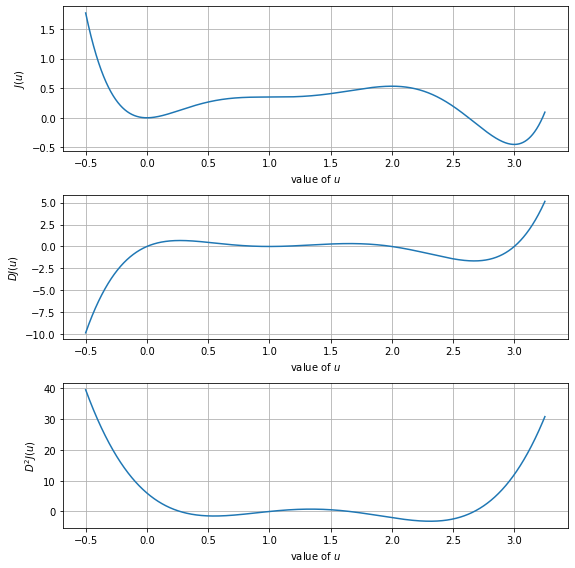

In [10]:
import numpy as np
import pylab as plt
import scipy as sp
from scipy import linalg as la
import scipy.optimize as opt
import scipy.stats as stats
from scipy.misc import derivative
%matplotlib inline

# Set figure properties
figsize = (8,8)
fig = plt.figure(figsize=figsize)

# Define function
def J(u): return u**6/6.0-7*u**5/5.0+17*u**4/4.0-17*u**3/3.0+3*u**2
def DJ(u): return derivative(J,u, dx=0.0001)
def DDJ(u): return derivative(DJ,u, dx=0.0001)

u = np.linspace(-.5,3.25,10000)
ax1 = plt.subplot(3,1,1); ax1.grid('on')
ax1.plot(u,J(u))
ax1.set_ylabel('$J(u)$')
ax1.set_xlabel('value of $u$')

ax2 = plt.subplot(3,1,2); ax2.grid('on')
ax2.plot(u,Dc(u))
ax2.set_ylabel('$DJ(u)$')
ax2.set_xlabel('value of $u$')

ax3 = plt.subplot(3,1,3); ax3.grid('on')
ax3.plot(u,DDc(u))
ax3.set_ylabel('$D^2J(u)$')
ax3.set_xlabel('value of $u$')

plt.tight_layout()

***Note:*** we see from the graph that $DJ(u)$ is a polynomial with single roots at $0, 2, 3$ and a double root at $1$, i.e. $DJ(u) \propto \cdot u \cdot (u - 1)^2 \cdot (u - 2) \cdot (u - 3)$.  Thus the stationary points are $0, 1, 2, 3$.


(b) *Determine all local minima of $J$ and the corresponding minimizing $u$.*


Visually it is clear that $0$ and $3$ are local minima -- these points also satisfy the sufficient conditions ($DJ = 0$, $D^2 J > 0$) for local minima.


(c) *Run the gradient descent iteration $u^+ = u - \alpha\, DJ(u)$ starting from multiple initial $u$'s and with multiple values of the parameter $\alpha > 0$. Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.*


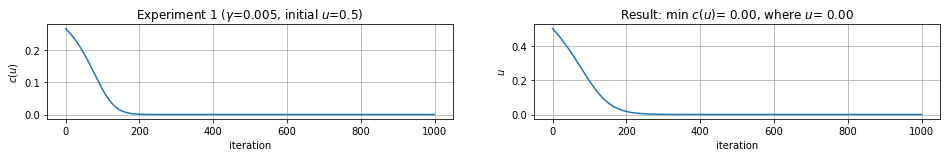

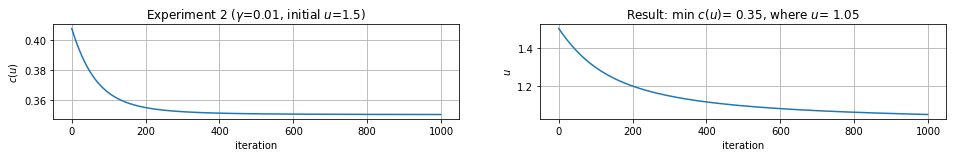

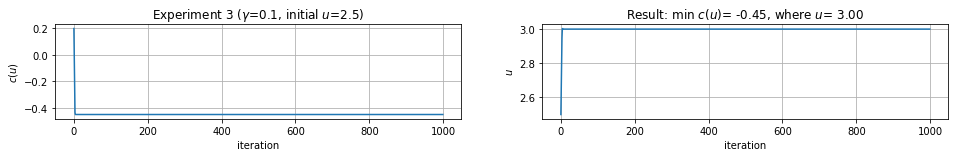

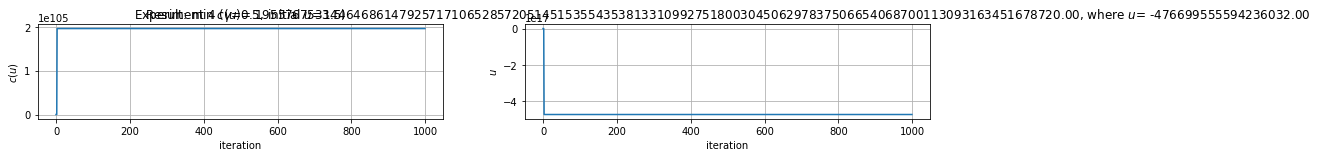

In [19]:
# Parameter settings
max_iter_list = [1000,1000,1000,1000]
r_list = [5e-3, 1e-2, 1e-1, 5e-1]
u_init_list = [.5, 1.5, 2.5, 3.5]

# Start experiments
for exp in range(len(r_list)):
 
 # Initialization settings
  max_iter = max_iter_list[exp]
  r = r_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  # Calculate interative update results
  for i in range(max_iter-1):
    u_plus = u_descent[i] - r*Dc(u_descent[i])
    u_descent[i+1] = u_plus
    c_descent[i+1] = c(u_plus)

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  
  # Draw results
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax1.plot(range(max_iter),c_descent)
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+')')

  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')
  ax2.plot(range(max_iter),u_descent)
  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')
  ax2.set_title('Result: min $c(u)$= '+str("%0.2f" % c_descent[max_iter-1])+', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))


(d) *Determine all local maxima of $J$ and the corresponding maximizing $u$.*


Visually it is clear that $2$ is a local maximum -- this point also satisfies the sufficient condition ($DJ = 0$, $D^2 J < 0$) for a local maximum.


(e) *Repeat (c) with the gradient ***ascent*** iteration $u^+ = u + \alpha\, DJ(u)$ starting from multiple initial $u$'s and with multiple values of the parameter $\alpha > 0$. Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.*


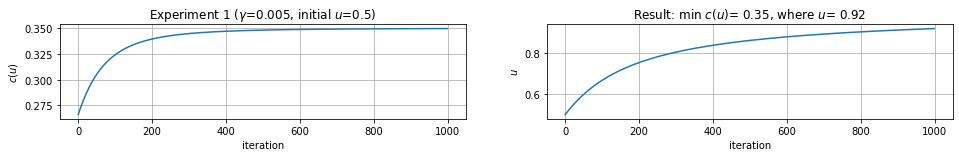

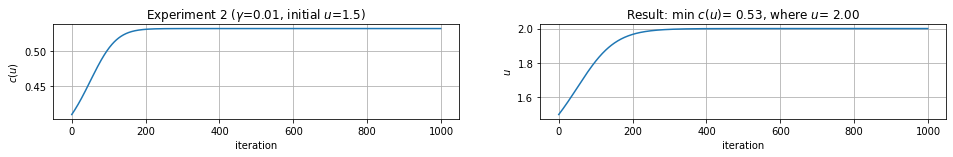

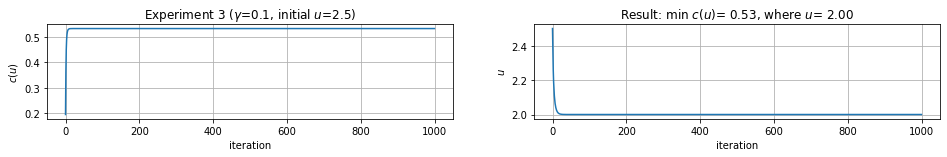

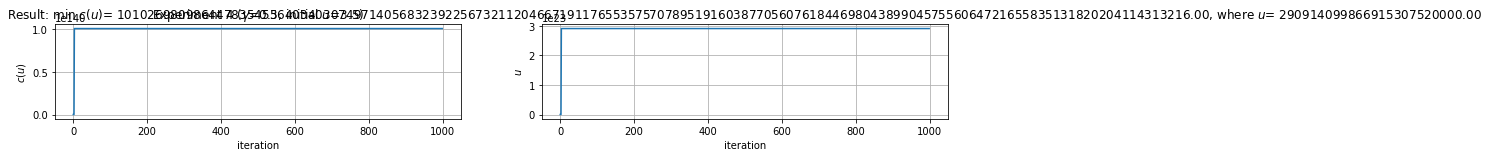

In [20]:
# Parameter settings
max_iter_list = [1000,1000,1000,1000]
r_list = [5e-3, 1e-2, 1e-1, 5e-1]
u_init_list = [.5, 1.5, 2.5, 3.5]

# Start experiments
for exp in range(len(r_list)):
 
 # Initialization settings
  max_iter = max_iter_list[exp]
  r = r_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  # Calculate interative update results
  for i in range(max_iter-1):
    u_plus = u_descent[i] + r*Dc(u_descent[i])
    u_descent[i+1] = u_plus
    c_descent[i+1] = c(u_plus)

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  
  # Draw results
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax1.plot(range(max_iter),c_descent)
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+')')

  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')
  ax2.plot(range(max_iter),u_descent)
  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')
  ax2.set_title('Result: min $c(u)$= '+str("%0.2f" % c_descent[max_iter-1])+', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))


***Takeaway:*** you should observe that stationary points (where $DJ = 0$) are fixed points for the iterations in (c) and (e), and that the minimizers in (b) / maximizers in (d) are locally attracting equilibrium points for the corresponding iteration (so long as $\alpha$ isn't too large).

# 2. linear-quadratic regulation

***Purpose:***  *control a nonlinear system near an equilibrium by linearizing and applying the linear-quadratic regulator.*

Consider the continuous-time nonlinear system (NL) from HW2 that models a pendulum:

$$m \ell^2 \ddot{q} + m g \ell \sin q = \ell u - \ell b \dot{q}.$$

Use parameter values $m = 1\ \text{kg}$, $\ell = 1\ \text{m}$, $g = 9.81\ \text{m/sec}^2$, $b = 1$ in the following problems.

(a) *Linearize (NL) about the unstable equilibrium $(x_0,u_0) = (\pi,0)$ to obtain the continuous-time linear time-invariant system* (LTI)

$$ \delta \dot{x} = A \delta x + B \delta u $$

*that approximates (NL) when $x \approx x_0 + \delta x$, $u \approx u_0 + \delta u$.*

**Solution:**

We first transform the second-order nonlinear system given to a first order system. Let $v = \dot{q}$, such that $\dot{v} = \ddot{q}$, and substituting into the second order system given results in:
$$f(x, u) = \left[\begin{array}{c} \dot{q} \\ \dot{v} \end{array}\right] = \left[\begin{array}{c} v \\ \frac{1}{ml}(u - bv - mg\sin q) \end{array}\right], $$
where $x = (q,v)$.

Therefore:
$$\delta \dot{x} = \underbrace{\frac{\delta f}{\delta x}\bigg\rvert_{\substack{x= \bar{x}\\u= \bar{u}}}}_{A} \delta x + \underbrace{\frac{\delta f}{\delta u}\bigg\rvert_{\substack{x= \bar{x}\\u= \bar{u}}}}_{B} \delta u .$$

Therefore:
$$A 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta q} &  \frac{\delta f_1}{\delta v}\\ \frac{\delta f_2}{\delta q} &  \frac{\delta f_2}{\delta v} \end{array}\right] 
= 
\left[\begin{array}{c} 0 &  1\\ \frac{-mg \cos q_0}{ml} &  \frac{-b}{ml} \end{array}\right]$$

For the unstable equilibrium $(x_0, u_0) = (\pi , 0)$ such that $\cos q_0 = \cos \pi = -1$, therefore
$$A 
= 
\left[\begin{array}{c} 0 &  1\\ \frac{mg}{ml} &  \frac{-b}{ml} \end{array}\right]$$


and
$$B
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta u} \\ \frac{\delta f_2}{\delta u} \end{array}\right] 
= 
\left[\begin{array}{c} 0 \\ \frac{1}{ml} \end{array}\right]$$



(b) *Apply the linear-quadratic regulator to (LTI) with the cost function*
$$ c(\delta x, \delta u) = \frac{1}{2} p\, \delta x_t^\top \delta x_t +  \frac{1}{2} \int_0^t q\, \delta x_s^\top \delta x_s + r\, \delta u_s^\top \delta u_s\, ds $$
*Plot $\delta x$, $\delta u$, and $c$ versus time with $p = 0$, $q = r = 1$, $x(0) = (\pi/2,0)$, and $t = 10\sqrt{\frac{\ell}{g}}\ \text{sec}$.*

(***Hint:*** you may apply the (DT-LQR) from lecture or (CT-LQR) from the preceding problem -- choose whichever you prefer.)

**Solution:**

Using the discrete time, we first discretize the matrices such that $\bar{A} = I + \Delta A$, $\bar{B} = \Delta B$, $\bar{Q} = \Delta Q$ and $\bar{R} = \Delta R$



In [ ]:
# Discrete time functions
def riccati_DT(A,B,Q,R,P):
    # optimal control is linear state feedback 
    K_ = np.dot( la.inv(np.dot(B.T,np.dot(P,B)) + R), np.dot(B.T,np.dot(P,A)) )
    # optimal value is quadratic in state
    P_ = np.dot( (A - np.dot(B,K_)).T, np.dot(P, (A - np.dot(B,K_))) + Q + np.dot(K_.T, np.dot(R, K_)) )
    return K_,P_

def lqr_DT(t,q=1,r=1,p=0, Delta=1e-1):
    A = np.identity(n_state) + Delta * np.array([[0, 1],[g/l, -b/(m*l)]])
    B = Delta * np.array([[0],[1/(m*l)]])
    Q = Delta * q * np.identity(n_state) # running state cost
    R = Delta * r * np.identity(m_input) # running control cost
    Pfinal = p * np.identity(n_state) # final state cost

    K = np.zeros((t, m_input, n_state)) # linear state feedback gain matrix
    P = np.zeros((t+1, n_state, n_state)) # cost-to-go
    P[t] = Pfinal

    # loop over times
    for s in range(t)[::-1]: # loop backward in time
        K[s],P[s] = riccati_DT(A,B,Q,R,P[s+1])
        
    return A,B,Q,R,K,P


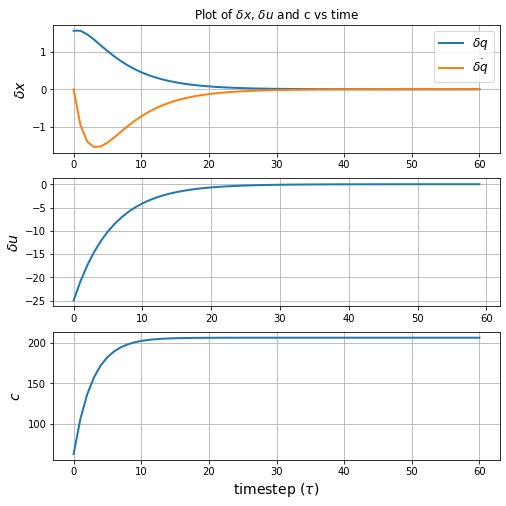

In [ ]:
# variables
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
T = np.rint(10 * np.sqrt(l/g)) # round up to nearest integer
delta = 5e-2
t = np.int_(T/delta)
t_ = np.arange(0, t+1)
p = 0
q = 1
r = 1

n_state = 2 # size of system state
m_input = 1 # size of input
dx0 = np.array([[np.pi/2],[0.0]])

du = np.zeros((t,m_input,1))
ct= np.zeros((t+1 ))
dx = np.zeros((t+1,n_state,1))
dx[0] = dx0

A,B,Q,R,K,P = lqr_DT(t,q=q,r=r,p=p)# find all the system matrices
for s in range(t):
  du[s] = np.dot(-K[s],dx[s])                        # calculate optimal input
  ct[s] = 0.5 * np.dot(dx[s].T, np.dot(Q, dx[s])) + \
        np.dot(du[s].T, np.dot(R, du[s]))  # calculate cost        
  dx[s+1] = np.dot(A,dx[s]) + np.dot(B, du[s])        # calculate next state
  if s == t:
    ct[s+1] = 0.5 * np.dot( dx[s+1].T, np.dot(P[s+1], dx[s+1]) )

c = np.cumsum(ct) # cummulative sum over timestep

# plot of x_bar and u_bar vs time
xlim = np.arange(0, t+1, 5).tolist()
fig = plt.figure(figsize=(8,8));

ax = plt.subplot(3,1,1)
plt.title(r'Plot of $\delta{x}$, $\delta{u}$ and c vs time')
plt.plot(t_, dx[:,0],linewidth=2,label=r'$\delta{q}$')
plt.plot(t_, dx[:,1],linewidth=2,label=r'$\dot{\delta{q}}$')
plt.ylabel(r'$\delta{x}$',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(3,1,2)
plt.plot(t_[:-1],du[:,0],linewidth=2)
plt.ylabel(r'$\delta{u}$',fontsize=14)
plt.grid()

ax = plt.subplot(3,1,3)
plt.plot(t_, c,linewidth=2)
plt.ylabel(r'$c$',fontsize=14)
plt.xlabel(r'timestep ($\tau$)',fontsize=14)
plt.grid()

(c) *Repeat (b) with $q \gg r$ and $q \ll r$. Plot $\delta x$, $\delta u$, and $c$ versus time and describe the qualitative differences from (b).*

**Solution:**

For $q \gg r$, let $q = 100$ and $r = 1$



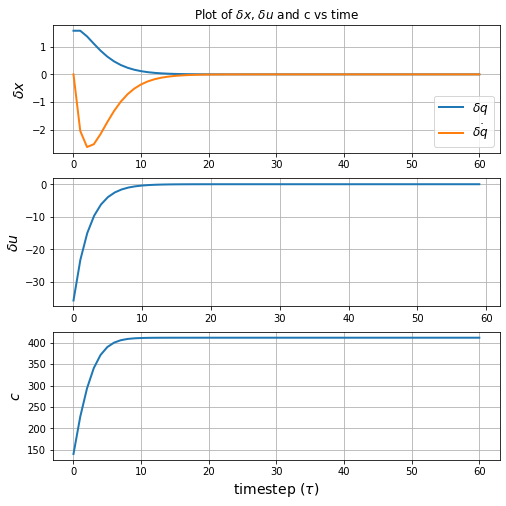

In [ ]:
# variables
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
T = np.rint(10 * np.sqrt(l/g)) # round up to nearest integer
delta = 5e-2
t = np.int_(T/delta)
t_ = np.arange(0, t+1)
p = 0
q_gg = 100
r = 1

n_state = 2 # size of system state
m_input = 1 # size of input
dx0 = np.array([[np.pi/2],[0.0]])

du = np.zeros((t,m_input,1))
ct= np.zeros((t+1 ))
dx = np.zeros((t+1,n_state,1))
dx[0] = dx0 

A,B,Q,R,K,P = lqr_DT(t,q=q_gg,r=r,p=p)# find all the system matrices
for s in range(t):
  du[s] = np.dot(-K[s],dx[s])                        # calculate optimal input
  ct[s] = 0.5 * np.dot(dx[s].T, np.dot(Q, dx[s])) + \
        np.dot(du[s].T, np.dot(R, du[s]))  # calculate cost        
  dx[s+1] = np.dot(A,dx[s]) + np.dot(B, du[s])        # calculate next state
  if s == t:
    ct[s+1] = 0.5 * np.dot( dx[s+1].T, np.dot(P[s+1], dx[s+1]) )

c = np.cumsum(ct) # cummulative sum over timestep

# plot of x_bar and u_bar vs time
xlim = np.arange(0, t+1, 5).tolist()
fig = plt.figure(figsize=(8,8));

ax = plt.subplot(3,1,1)
plt.title(r'Plot of $\delta{x}$, $\delta{u}$ and c vs time')
plt.plot(t_, dx[:,0],linewidth=2,label=r'$\delta{q}$')
plt.plot(t_, dx[:,1],linewidth=2,label=r'$\dot{\delta{q}}$')
plt.ylabel(r'$\delta{x}$',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(3,1,2)
plt.plot(t_[:-1],du[:,0],linewidth=2)
plt.ylabel(r'$\delta{u}$',fontsize=14)
plt.grid()

ax = plt.subplot(3,1,3)
plt.plot(t_, c,linewidth=2)
plt.ylabel(r'$c$',fontsize=14)
plt.xlabel(r'timestep ($\tau$)',fontsize=14)
plt.grid()

For $q \ll r$, let $q = 0.01$ and $r = 1$

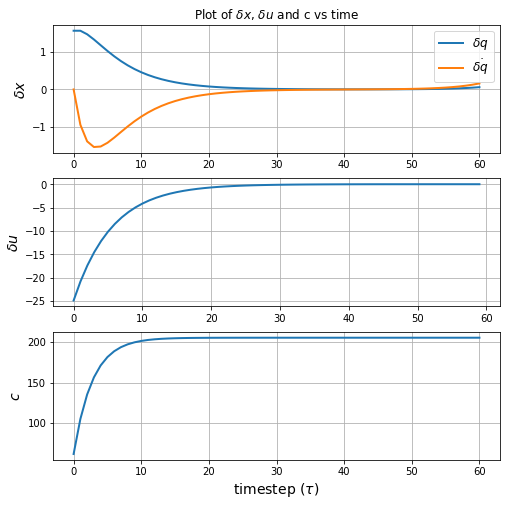

In [ ]:
# variables
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
T = np.rint(10 * np.sqrt(l/g)) # round up to nearest integer
delta = 5e-2
t = np.int_(T/delta)
t_ = np.arange(0, t+1)
p = 0
q_small = 0.01
r = 1

n_state = 2 # size of system state
m_input = 1 # size of input
dx0 = np.array([[np.pi/2],[0.0]])

du = np.zeros((t,m_input,1))
ct= np.zeros((t+1 ))
dx = np.zeros((t+1,n_state,1))
dx[0] = dx0

A,B,Q,R,K,P = lqr_DT(t,q=q_small,r=r,p=p)# find all the system matrices
for s in range(t):
  du[s] = np.dot(-K[s],dx[s])                        # calculate optimal input
  ct[s] = 0.5 * np.dot(dx[s].T, np.dot(Q, dx[s])) + \
        np.dot(du[s].T, np.dot(R, du[s]))  # calculate cost        
  dx[s+1] = np.dot(A,dx[s]) + np.dot(B, du[s])        # calculate next state
  if s == t:
    ct[s+1] = 0.5 * np.dot( dx[s+1].T, np.dot(P[s+1], dx[s+1]) )

c = np.cumsum(ct) # cummulative sum over timestep

# plot of x_bar and u_bar vs time
xlim = np.arange(0, t+1, 5).tolist()
fig = plt.figure(figsize=(8,8));

ax = plt.subplot(3,1,1)
plt.title(r'Plot of $\delta{x}$, $\delta{u}$ and c vs time')
plt.plot(t_, dx[:,0],linewidth=2,label=r'$\delta{q}$')
plt.plot(t_, dx[:,1],linewidth=2,label=r'$\dot{\delta{q}}$')
plt.ylabel(r'$\delta{x}$',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(3,1,2)
plt.plot(t_[:-1],du[:,0],linewidth=2)
plt.ylabel(r'$\delta{u}$',fontsize=14)
plt.grid()

ax = plt.subplot(3,1,3)
plt.plot(t_, c,linewidth=2)
plt.ylabel(r'$c$',fontsize=14)
plt.xlabel(r'timestep ($\tau$)',fontsize=14)
plt.grid()

Setting $q \gg r$ means that there is more emphasis on returning to the equilibirum state as represented by an increased weight on the state cost. This can be observed in the plot where the states converges faster and therefore uses more control effort resulting in a higher cost. On the other hand, setting $q \ll r$ means little emphasis on the states returning to equilibrium as observed in the from the plot. This comapres to (b) where equal weight is placed on state and control such that the there is a balance between the state converging the control effort used in driving the state to equilibrium.

It is interesting to note that the control effort and cost of the $q \ll r$ is the same as the $q = r$. 



(d) *Simulate the Riccati DE for larger and larger values of $t$, i.e. as $t \rightarrow \infty$.  Plot $P_s$ versus time $s$; you should observe that $\lim_{s\rightarrow 0} P_s = P_0$ is an equilibrium of the Riccati DE -- this equilibrium solves the infinite-horizon ($t = \infty$) variant of the linear-quadratic regulator.*

**Solution:**

Simulating for $t \in [50, 100, 150]$



[[70.573 18.934]
 [19.053  5.224]]
[[70.573 18.934]
 [19.053  5.224]]
[[70.573 18.934]
 [19.053  5.224]]


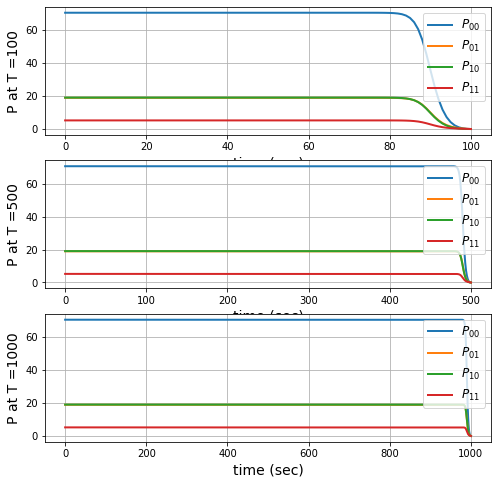

In [ ]:
# variables
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2

p = -0
q = 1
r = 1

n_state = 2 # size of system state
m_input = 1 # size of input
t = np.array([100, 500, 1000])

# plot of x_bar and u_bar vs time
# xlim = np.arange(0, t+1, 5).tolist()
fig = plt.figure(figsize=(8,8));
plt.title(r'Plot of $\delta{x}$, $\delta{u}$ and c vs time')
for s in range(t.size):
  _,_,_,_,_,P = lqr_DT(t[s],q=q,r=r,p=p) # find P matrix for different timesteps
  Pfinal = P[-1]
  print(P[0,:,:])
  ax = plt.subplot(t.size,1,s+1)
  plt.plot(P[:, 0, 0],linewidth=2,label=r'$P_{00}$')
  plt.plot(P[:, 0, 1],linewidth=2,label=r'$P_{01}$')
  plt.plot(P[:, 1, 0],linewidth=2,label=r'$P_{10}$')
  plt.plot(P[:, 1, 1],linewidth=2,label=r'$P_{11}$')
  plt.ylabel(r'P at T =' + str(t[s]),fontsize=14)
  plt.xlabel(r'time (sec)',fontsize=14)
  plt.legend(fontsize=12)
  plt.grid()

***Bonus:*** if you used the (DT-LQR) in (b--d), repeat using the (CT-LQR), or vice-versa; the results should be similar, but not identical.

**Solution:**
Repeating using CT-LQR with $K_s$ and $\dot{P}_s$ in Q2, and also the continuous time matrix $A, B, Q$ and $R$.

(e) *Apply a linear-quadratic regulator from one of the preceding problems to the original (NL) system.  Plot and discuss any differences you observe between: $x - x_0$ and $\delta x$ versus time; $u - u_0$ and $\delta u$ versus time.*


In [ ]:
# LQR applied to Linearized System same as (b)
# variables
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
T = np.rint(10 * np.sqrt(l/g)) # round up to nearest integer
delta = 5e-2
t = np.int_(T/delta)
t_ = np.arange(0, t+1)
p = 0
q = 1
r = 1

n_state = 2 # size of system state
m_input = 1 # size of input
dx0 = np.array([[np.pi/2],[0.0]])

du = np.zeros((t,m_input,1))
ct= np.zeros((t+1 ))
dx = np.zeros((t+1,n_state,1))
dx[0] = dx0

A,B,Q,R,K,P = lqr_DT(t,q=q,r=r,p=p)# find all the system matrices
for s in range(t):
  du[s] = np.dot(-K[s],dx[s])                        # calculate optimal input
  ct[s] = 0.5 * np.dot(dx[s].T, np.dot(Q, dx[s])) + \
        np.dot(du[s].T, np.dot(R, du[s]))  # calculate cost        
  dx[s+1] = np.dot(A,dx[s]) + np.dot(B, du[s])        # calculate next state
  if s == t:
    ct[s+1] = 0.5 * np.dot( dx[s+1].T, np.dot(P[s+1], dx[s+1]) )

c = np.cumsum(ct) # cummulative sum over timestep

In [ ]:
# LQR applied to Non-linear System 
T = 10 * np.sqrt(l/g)
dt = 1e-2
t_dt = np.int_(T/dt)

# Non-linear system
def f(t,x,u):
    q, v = x[:1], x[1:] 

    return np.hstack([v, (1/(m * l)) * (u - (b * v) - (m * g * np.sin(q)))])

diff_x = np.hstack((np.pi/2,0)) # x-x0
utx = lambda t,x: np.squeeze(np.dot(-K[0], x)) # using K from above DT system

t_diff,x_diff,u_diff = numerical_simulation(f,T,diff_x,dt=dt,utx=utx,return_u=True)

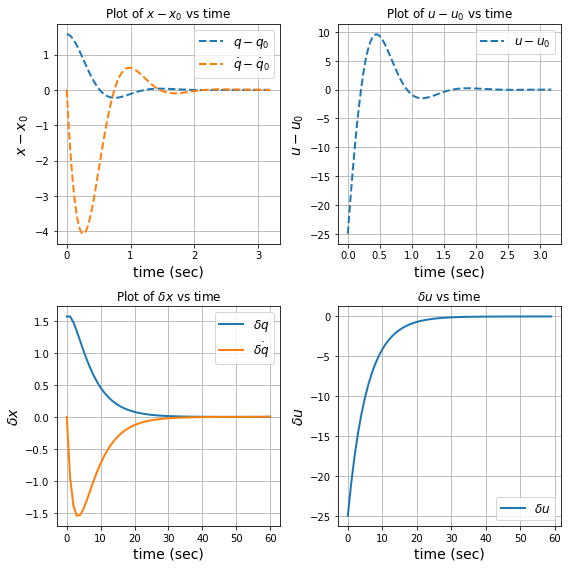

In [ ]:
# plot state
fig = plt.figure(figsize=(8,8));
ax = plt.subplot(2,2,1)
# plot nonlinear state
plt.title(r'Plot of $x-x_0$ vs time')
plt.plot(t_diff, x_diff[:,0],'--',linewidth=2, label=r'$q-q_0$')
plt.plot(t_diff, x_diff[:,1],'--',linewidth=2,label=r'$\dot{q} - \dot{q}_0$')
plt.ylabel(r'$x-x_0$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# plot control
ax = plt.subplot(2,2,2)
# plot nonlinear control
plt.title(r'Plot of $u-u_0$ vs time')
plt.plot(t_diff[:-1], u_diff,'--',linewidth=2, label=r'$u-u_0$')
plt.ylabel(r'$u-u_0$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(2,2,3)
# plot linearized state
plt.title(r'Plot of $\delta{x}$ vs time')
plt.plot(t_, dx[:,0],linewidth=2, label=r'$\delta{q}$')
plt.plot(t_, dx[:,1],linewidth=2, label=r'$\dot{\delta{q}}$')
plt.ylabel(r'$\delta{x}$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(2,2,4)
# plot linearized control
plt.title(r'$\delta{u}$ vs time')
plt.plot(t_[:-1],du[:,0],linewidth=2, label=r'$\delta{u}$')
plt.ylabel(r'$\delta{u}$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()

Applying an infinite-time horizon LQR to the original non-linear system results in a system that stabilizes over time although some overshoot can be observed in both the state and control. Applying the LQR to the linearized system results in a smoothly stabilized system with no overshoots.

***Takeaway:*** the linear-quadratic regulator -- discrete- or continuous-time;  finite- or infinite-time horizon -- can be applied to control linear and nonlinear systems near their equilibria.

# BONUS:  continuous-time linear-quadratic regulation (CT-LQR)

***Purpose:*** *derive the solution to the continuous-time linear-quadratic regulator using the solution of the discrete-time case.*

Consider the following continuous-time linear-quadratic regulation problem (CT-LQR):

$$ \min_u c_\tau (x,u) \ \text{subject to}\ \dot{x}_s = A_s x_s + B_s u_s, $$

$$ c_\tau (x,u) = \frac{1}{2} x_t^\top P_t x_t + \frac{1}{2} \int_\tau^t x_s^\top Q_s x_s + u_s^\top R_s u_s\, ds. $$

Since there aren't discrete "stages", we can't (obviously) apply Bellman's principle (the continuous-time analog of the discrete-time Bellman equation is a partial differential equation, termed a *Hamilton-Jacobi-Bellman* equation).

Instead, we will discretize the (CT-LQR) problem to obtain the (DT-LQR) problem

$$ \min_u \bar{c}_\tau (\bar{x},\bar{u}) \ \text{subject to}\ \bar{x}_{s+\Delta} = \bar{A}_s \bar{x}_s + \bar{B}_s \bar{u}_s, $$

$$ \bar{c}_\tau (\bar{x},\bar{u}) = \frac{1}{2} \bar{x}_T^\top P_T \bar{x}_T + \frac{1}{2} \sum_{s=\tau}^{T-1} \bar{x}_s^\top \bar{Q}_s \bar{x}_s + \bar{u}_s^\top \bar{R}_s \bar{u}_s, $$

where $T = t / \Delta$ (assume $\Delta$ divides $t$ evenly) and the following approximations hold:

$$ \bar{A}_s = I + \Delta \cdot A_s + O(\Delta^2),\ \bar{B}_s = \Delta \cdot B_s + O(\Delta^2), $$

$$ \bar{Q}_s = \Delta \cdot Q_s + O(\Delta^2),\ \bar{R}_s = \Delta \cdot R_s + O(\Delta^2). $$

Let ${K}_s$, ${P}_s$ be such that $\bar{u}_s^* = -{K}_s \bar{x}_s$ is the optimal control input and $\bar{v}_s^* = \frac{1}{2} \bar{x}_s\top {P}_s \bar{x}_s$ is the corresponding optimal value for the (DT-LQR) -- refer to the lecture notes for the formulas for $K_s$ and $P_s$.


(a) *Show that ${K}_s = R_{s}^{-1} B_{s}^\top P_{s+\Delta} + O(\Delta)$.*

The (DT-LQR) solution is given by
$$ K_s = (\bar{B}_{s}^\top P_{s+\Delta} \bar{B}_{} + \bar{R}_{s})^{-1} \bar{B}_{s}^\top P_{s+\Delta}. $$
The given expressions for $\bar{B}_s$ and $\bar{R}_s$ imply
$$ \bar{B}_{s}^\top P_{s+\Delta} \bar{B}_{s} + \bar{R}_{s} = \Delta R_s + O(\Delta^2), $$
which implies $K_s = R_s^{-1} B_s^\top P_{s+\Delta} + O(\Delta)$.


(b) *Show that ${P}_s = {P}_{s+\Delta} + \Delta\cdot A_s^\top {P}_{s+\Delta} + \Delta\cdot{P}_{s+\Delta} A_s - \Delta\cdot{P}_{s+\Delta} B_s R_s^{-1} B_s^\top P_{s+\Delta} + \Delta \cdot Q_s + O(\Delta^2)$.*

The (DT-LQR) solution is given by
$$ P_s = (\bar{A}_s - \bar{B}_s K_s)^\top P_{s+\Delta} (\bar{A}_s - \bar{B}_s K_s) + K_s^\top \bar{R}_s K_s + \bar{Q}_s. $$
The given expressions for $\bar{A}_s$ and $\bar{B}_s$ imply
$$ (\bar{A}_s - \bar{B}_s K_s)^\top P_{s+\Delta} (\bar{A}_s - \bar{B}_s K_s) $$
$$ = (I + \Delta(A_s - B_s K_s))^\top P_{s+\Delta} (I + \Delta(A_s - B_s K_s)) $$ 
$$ = P_{s+\Delta} +  \Delta(A_s - B_s K_s)^\top P_{s+\Delta} + \Delta P_{s+\Delta} (A_s - B_s K_s) + O(\Delta^2) $$ 
$$ = P_{s+\Delta} + \Delta A_s^\top P_{s+\Delta} + \Delta P_{s+\Delta} A_s - 2 \Delta P_{s+\Delta} B_s R_s^{-1} B_s^\top P_{s+\Delta}  + O(\Delta^2), $$ 
while the given expression for $\bar{R}_s$, and $\bar{Q}_s$ imply
$$ K_s^\top \bar{R}_s K_s + \bar{Q}_s = \Delta P_{s+\Delta} B_s R_s^{-1} B_s^\top P_{s+\Delta} + \Delta Q_s + O(\Delta^2), $$
which implies 
${P}_s = {P}_{s+\Delta} + \Delta\cdot A_s^\top {P}_{s+\Delta} + \Delta\cdot{P}_{s+\Delta} A_s - \Delta\cdot{P}_{s+\Delta} B_s R_s^{-1} B_s^\top P_{s+\Delta} + \Delta \cdot Q_s + O(\Delta^2)$

We conclude that 

$$-\dot{P}_s = \lim_{\Delta\rightarrow 0}\frac{1}{\Delta}({P}_s - {P}_{s+\Delta}) = A_s^\top P_s + P_s A_s - P_s B_s R^{-1}_s B_s^\top P_s + Q_s; $$  

this is referred to as a *Riccati* differential equation (DE).

***Takeaway:*** the solution to the (CT-LQR) problem is related to, but algebraically simpler than, the solution to the (DT-LQR) problem -- in particular, expressions for the state-feedback matrix and Riccati DE are simpler in continuous-time than discrete-time.
